In [419]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sts
print(sts.__version__)

0.11.1


In [420]:
co2 = pd.read_csv('../01.Dados/co2.csv',delimiter='\t')
display(co2.head())
display(co2.shape)

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


(477, 2)

Text(0, 0.5, 'media')

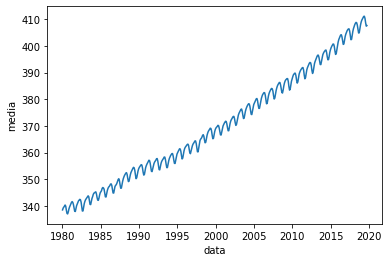

In [421]:
plt.plot(co2['data'],co2['media'])
plt.xlabel('data')
plt.ylabel('media')

Temos uma tendência nesse gráfico, ou uma série não estacinária.

In [422]:
nasc = pd.read_csv('../01.Dados/nascimentos.csv')
display(nasc.head())
display(nasc.shape)

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


(365, 2)

Text(0.5, 0, 'data')

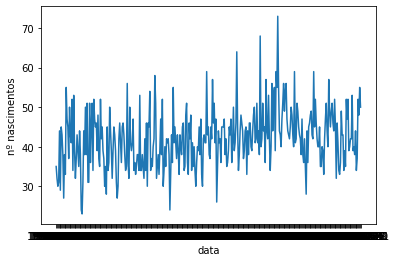

In [423]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.ylabel('nº nascimentos')
plt.xlabel('data')

muitos intervalos, gráfico poluído.

In [424]:
nasc['data'] = pd.to_datetime(nasc['data'])


In [425]:
register_matplotlib_converters()

Text(0.5, 0, 'data')

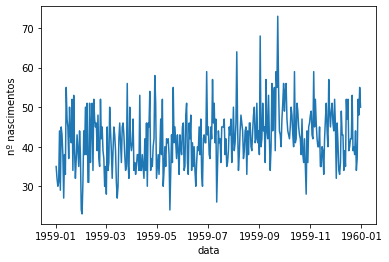

In [426]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.ylabel('nº nascimentos')
plt.xlabel('data')

Gráfico de passeio aleatório e com ruído.

# Base de dados para previsão

In [427]:
media_co2 = np.mean(co2['media'])
media_co2

370.10314465408806

In [428]:
dt_carb = co2['data'][1] - co2['data'][0]
dt_carb

0.0829999999998563

Text(0, 0.5, 'media')

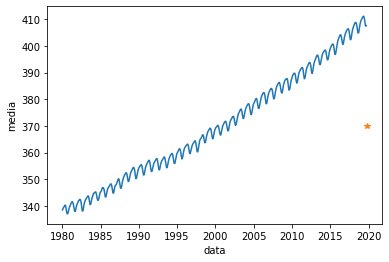

In [429]:
plt.plot(co2['data'],co2['media'])
plt.plot(co2.iloc[-1,0]+dt_carb, media_co2,'*')
plt.xlabel('data')
plt.ylabel('media')

Errou muito, pois os dados tem tendência.

In [430]:
media_nasc = np.mean(nasc['n_nasc'])

In [431]:
dt_nasc = nasc['data'][1] - nasc['data'][0]

Text(0.5, 0, 'data')

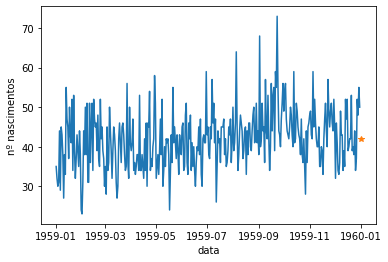

In [432]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_nasc,'*')
plt.ylabel('nº nascimentos')
plt.xlabel('data')

Errou pouco, pois gráfico é estacionário.

In [433]:
media_tres_pontos_c = np.mean(co2['media'][474:476])


Text(0, 0.5, 'media')

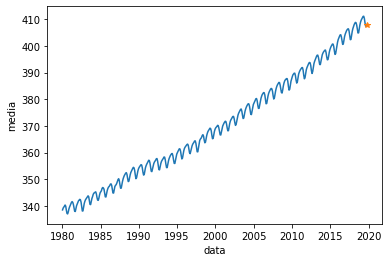

In [434]:
plt.plot(co2['data'],co2['media'])
plt.plot(co2.iloc[-1,0]+dt_carb, media_tres_pontos_c,'*')
plt.xlabel('data')
plt.ylabel('media')

Caiu em cima!

In [435]:
media_tres_pontos_n = np.mean(nasc['n_nasc'][362:364])

Text(0.5, 0, 'data')

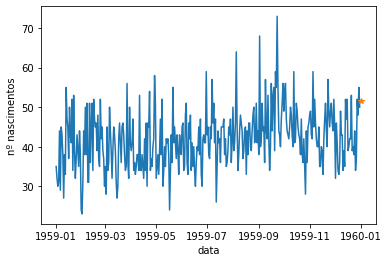

In [436]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_tres_pontos_n,'*')
plt.ylabel('nº nascimentos')
plt.xlabel('data')

Erramos muito menos!

Text(0.5, 0, 'data')

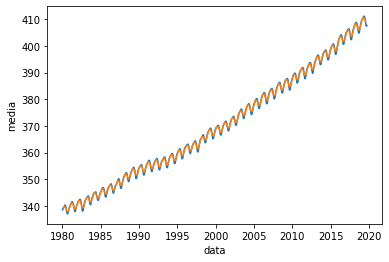

In [437]:
# ajuda a fazer previsões com dados ruidos
media_model_c  = co2.rolling(5).mean() # media movel
plt.plot(co2['data'],co2['media'])
plt.plot(media_model_c['data'],media_model_c['media'])
plt.ylabel('media')
plt.xlabel('data')

Text(0.5, 0, 'data')

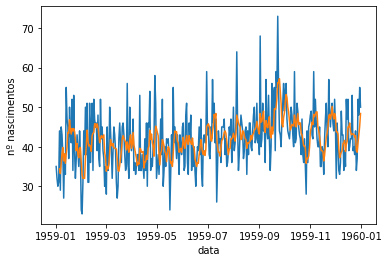

In [438]:
media_movel_n = nasc.rolling(5).mean()
plt.plot(nasc['data'],nasc['n_nasc'])
plt.plot(nasc['data'],media_movel_n['n_nasc'])
plt.ylabel('nº nascimentos')
plt.xlabel('data')

ajuda melhor a fazer previsões e analise da série temporal

## Decomposição da base dados

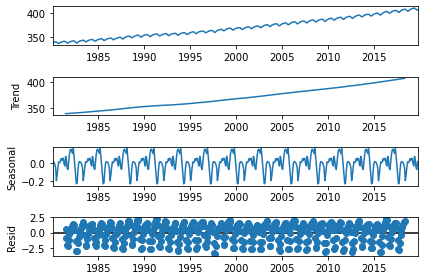

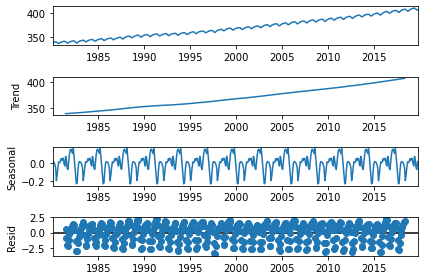

In [439]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_c = seasonal_decompose(co2.set_index('data'),period=35)
result_c.plot()

há pouco resíduos comparados aos valores reais.

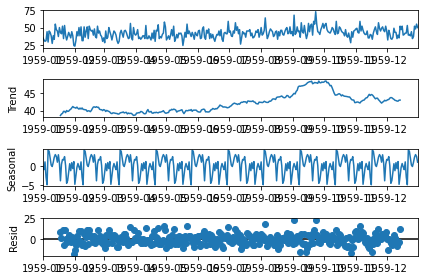

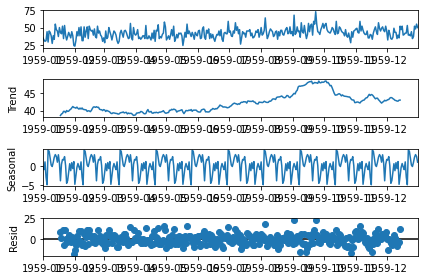

In [440]:
result_nasc = seasonal_decompose(nasc.set_index('data'),period=35)
result_nasc.plot()

Alto resíduos nos diz que há sazonalidade na série.

## Estacionaridade da série

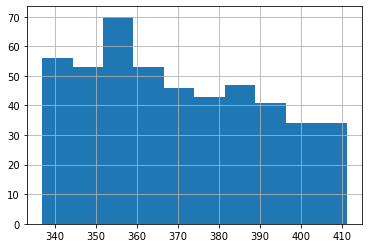

In [441]:
co2['media'].hist()

Se o histogram tivesse uma forma gaussiana então haveria uma estacionaridade nos dados.

In [442]:
divide = int(len(co2)/2)
x = co2['media'].values


In [443]:
c1 , c2 = x[0:divide],x[divide:]

In [444]:
c1.mean()

352.31550420168065

In [445]:
c2.mean()

387.816359832636

há pouca variaçã, indicativo de não estacionaridade.

In [446]:
divide = int(len(nasc)/2)
x = nasc['n_nasc'].values
n1,n2 = x[0:divide],x[divide:]
print(n1.mean(),n2.mean())
print(n1.var(),n2.var())

39.76373626373626 44.185792349726775
49.21341021615746 48.708650601690096


Muita variação, mostra sua não estacionaridade.

## Teste para estacionaridade da série - Teste ADF

In [447]:
from statsmodels.tsa.stattools import adfuller
resultado_c = adfuller(co2['media'].values)
print(resultado_c)
print('*'*80)
print(f'Estatística ADF:{resultado_c[0]} como é positivo mostra que não é estacionária')
print(f'p-valor:{resultado_c[1]} como é maior que 0.05 então não é estacionaria')

(3.0368288291670296, 1.0, 18, 458, {'1%': -3.4447087976702284, '5%': -2.867871300049488, '10%': -2.5701423432047443}, -572.1328605372778)
********************************************************************************
Estatística ADF:3.0368288291670296 como é positivo mostra que não é estacionária
p-valor:1.0 como é maior que 0.05 então não é estacionaria


In [448]:
resultado_n = adfuller(nasc['n_nasc'].values)
print(resultado_n)
print('*'*80)
print(f'Estatística ADF: {resultado_n[0]} como é negativo mostra que é estacionária')
print(f'p-valor: {resultado_n[1]} como é menor que 0.05 então é estacionaria')

(-4.808291253559762, 5.243412990149882e-05, 6, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 2343.8290926464197)
********************************************************************************
Estatística ADF: -4.808291253559762 como é negativo mostra que é estacionária
p-valor: 5.243412990149882e-05 como é menor que 0.05 então é estacionaria


## Previsões de valores futuros

In [449]:
co2 = co2.set_index('data')

In [450]:
display(co2.head())
display(co2[1980.042:2015])


,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30


,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30
...,...
2014.625,394.81
2014.708,394.89
2014.792,396.14


In [451]:
co2_teste  = co2[2015:]
co2_treino = co2[0:2015]
co2[2015:].head()

,media
data,
2015.042,399.32
2015.125,399.88
2015.208,400.33
2015.292,400.73
2015.375,400.68


In [452]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level=0.5)

C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [453]:
co2_treino.shape

(420, 1)

In [454]:
co2_teste.shape

(57, 1)

In [455]:
modelo_previsto = modelo_ajustado.forecast(57)

C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


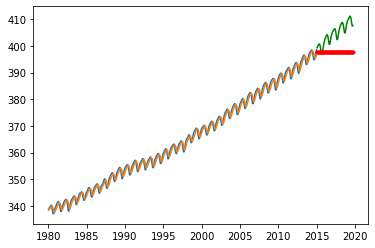

In [456]:
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index,modelo_previsto,'r.')

In [457]:
nasc = nasc.set_index('data')
nasc_treino = nasc['1959-01-01':'1959-12-01']
nasc_teste = nasc['1959-12-01':]

In [458]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5)

C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [459]:
nasc_teste.shape[0]

31

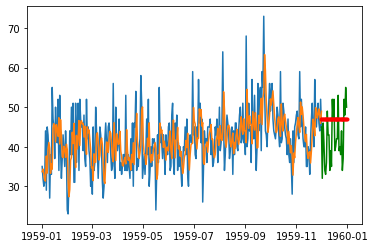

In [460]:
modelo_previsto = modelo_ajustado.forecast(31)
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index, modelo_previsto,'r.')

## Modelo aditivo
Yt = Nivel + Tendencia + Sazonalidade + Ruído
## Modelo multiplicativo
Y2 = Nivel x  Tendencia x Sazonalidade x Ruido
## Tendencia aditiva
E_(t+k) = Nt + kTt
## Atualização do nível
Nt = aYt + (1-a)(Nt-1 + Tt-1)
## Atualização da tendência
Tt = b(Nt - Nt-1) + (1-b)Tt-1
## Tendência multiplicativa
Et+k = Nt(Tt)^k
## Holt-Winters
### Modelo aditivo
Et+k = Nt + kTt + St+k-m
### Modelo multiplicativo com tendência aditiva
Et+k = (Nt+kTt)St+k-m

In [461]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
modelo_ajustado = ExponentialSmoothing(co2_treino.values, trend='additive',
                                       seasonal='additive',seasonal_periods=35).fit()

C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [462]:
co2.shape

(477, 1)

In [463]:
co2_teste.shape

(57, 1)

In [464]:
modelo_previsto = modelo_ajustado.predict(start=420, end=476)
modelo_previsto

array([399.94921021, 400.54358791, 400.8350552 , 400.63517699,
       399.41320206, 397.43853047, 396.3895232 , 397.22678282,
       398.9866668 , 400.48755154, 401.4006425 , 402.15230521,
       402.81604063, 403.41621479, 403.79413024, 403.60659149,
       402.50710839, 400.77029119, 399.50390637, 399.61306447,
       401.03576345, 402.54112053, 403.46175847, 404.09483801,
       404.54774815, 404.84965072, 405.15575036, 405.05986115,
       403.83152528, 402.02359469, 400.8867832 , 401.11634116,
       402.53690804, 404.12457592, 405.82575935, 406.52637453,
       407.12075224, 407.41221952, 407.21234132, 405.99036638,
       404.0156948 , 402.96668752, 403.80394714, 405.56383113,
       407.06471586, 407.97780682, 408.72946954, 409.39320495,
       409.99337911, 410.37129457, 410.18375582, 409.08427271,
       407.34745551, 406.0810707 , 406.1902288 , 407.61292778,
       409.11828485])

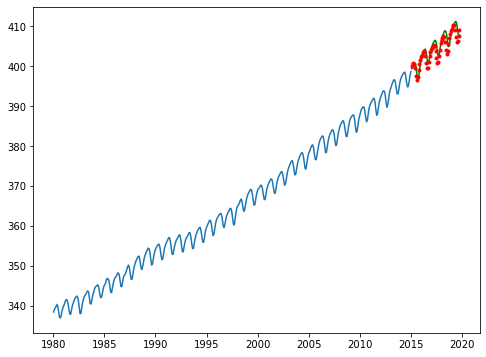

In [465]:
plt.figure(figsize=(8,6))
plt.plot(co2_treino)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index, modelo_previsto,'r.')

In [466]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values, trend='multiplicative', seasonal=None).fit()

C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [467]:
nasc_treino.shape

(335, 1)

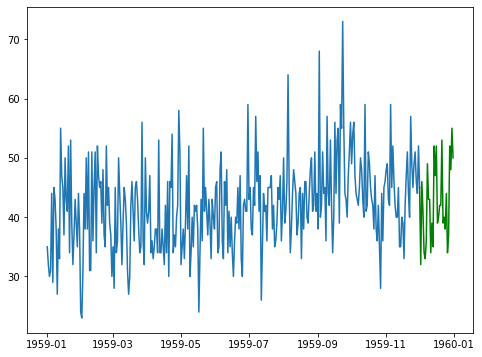

In [468]:
plt.figure(figsize=(8,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.show()

In [469]:
modelo_previsto_suave = modelo_ajustado.predict(start=335, end=365)
modelo_previsto_suave.shape

(31,)

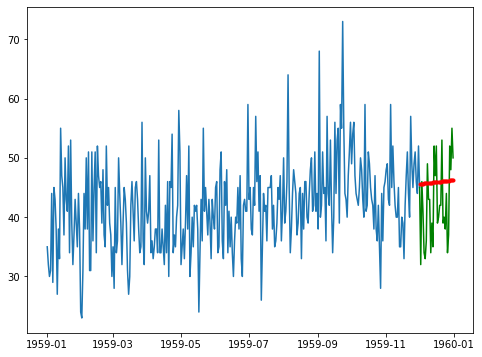

In [470]:
plt.figure(figsize=(8,6))
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto_suave,'r.')

### Funções de autocorrelações são para verificar periodicidade ou sazonalidade dos dados

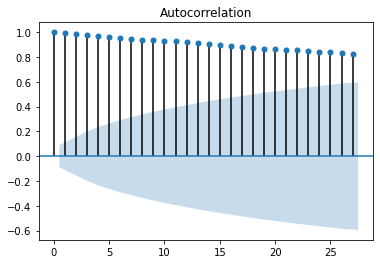

In [471]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(co2);

Temos muitos dados próximos a 1, vemos que há um sazonalidade nos dados. A parte azul se trata do inverlo de confiança dos dados.

### Autocorrelação parcial

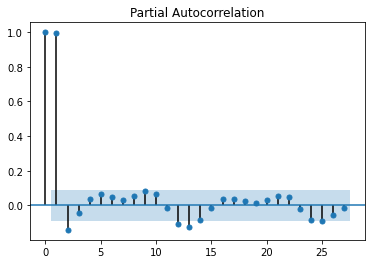

In [472]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(co2);

podemos ver que os valores caem rapidamente, mas sabem vairam periodicamente, constatando sua periodicidade.

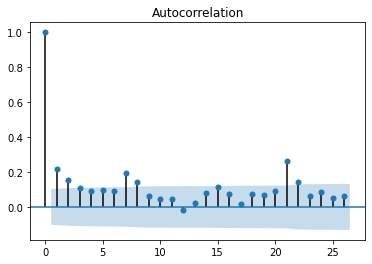

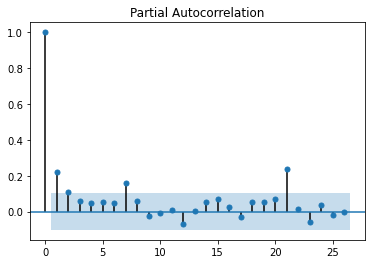

In [473]:
plot_acf(nasc['n_nasc']);
plot_pacf(nasc['n_nasc']);

Como vemos que os valores caem rapidamente, podemos ver que não há correlação.

In [474]:
from statsmodels.tsa.ar_model import AutoReg
lista = np.linspace(1,40,40)
modelo_ajustado = AutoReg(co2_treino.values,
                          lags=lista,
                          trend='c', # c de tendência cumulativa
                          seasonal=True, # os dados são sazonais
                          period=35 # que há peridicidade nos dados
                         ).fit()
modelo_previsto = modelo_ajustado.predict(start=420,end=476)

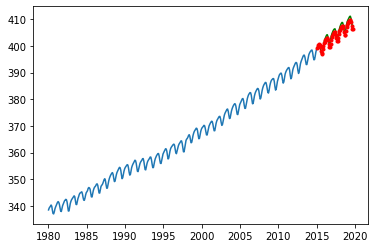

In [475]:
plt.plot(co2_treino)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index, modelo_previsto_ar,'r.')

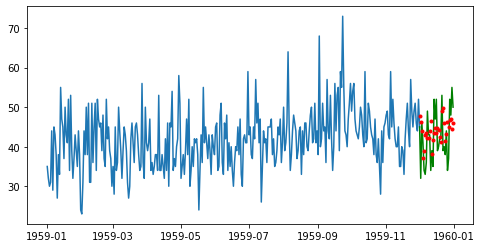

In [476]:
lista = np.linspace(1,40,40)
modelo_ajustado = AutoReg(nasc_treino.values, lags=lista, trend='c',seasonal=True,period=35).fit()
modelo_previsto = modelo_ajustado.predict(start=335,end=365)
plt.figure(figsize=(8,4))
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index, modelo_previsto,'r.')

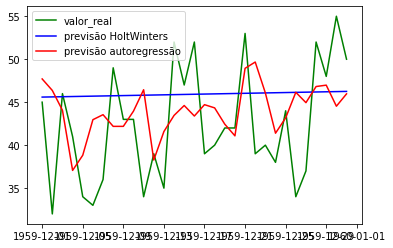

In [477]:
plt.plot(nasc_teste,'g',label='valor_real')
plt.plot(nasc_teste.index, modelo_previsto_suave,'b',label='previsão HoltWinters')
plt.plot(nasc_teste.index, modelo_previsto,'r',label='previsão autoregressão')
plt.legend()
plt.show()

## Cálculo de acerto do modelo

In [478]:
Erro_prev_s = nasc_teste['n_nasc'] - modelo_previsto_suave

In [479]:
Erro_prev = nasc_teste['n_nasc'] - modelo_previsto

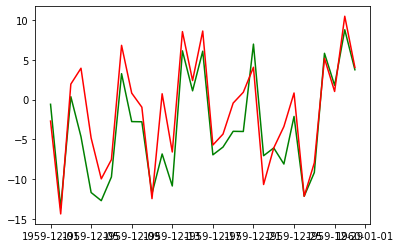

In [480]:
plt.plot(Erro_prev_s,'g')
plt.plot(Erro_prev,'r')

In [481]:
np.mean(Erro_prev_s)

-3.536121590588683

In [482]:
np.mean(Erro_prev)

-1.60830808044997

In [483]:
np.mean(np.abs(Erro_prev_s))

6.374536066871182

In [484]:
np.mean(np.abs(Erro_prev))

5.496720548092143

In [485]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(nasc_teste['n_nasc'],modelo_previsto)
mae

5.496720548092143

In [486]:
from sklearn.metrics import mean_squared_error
mean_squared_error(nasc_teste['n_nasc'],modelo_previsto_suave)

54.39583540484056